Positive relationships:  [('Acciaiuoli', 'Medici'), ('Medici', 'Barbadori'), ('Medici', 'Ridolfi'), ('Medici', 'Tornabuoni'), ('Medici', 'Albizzi'), ('Medici', 'Salviati'), ('Castellani', 'Peruzzi'), ('Castellani', 'Strozzi'), ('Castellani', 'Barbadori'), ('Peruzzi', 'Strozzi'), ('Peruzzi', 'Bischeri'), ('Strozzi', 'Ridolfi'), ('Strozzi', 'Bischeri'), ('Ridolfi', 'Tornabuoni'), ('Tornabuoni', 'Guadagni'), ('Albizzi', 'Ginori'), ('Albizzi', 'Guadagni'), ('Salviati', 'Pazzi'), ('Bischeri', 'Guadagni'), ('Guadagni', 'Lamberteschi')]


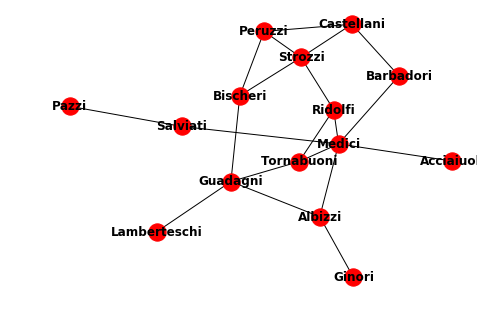

In [13]:
import networkx as nx


florentine_graph = nx.florentine_families_graph() # Getting the graph from the library

florentine_graph.add_edges_from([(u, v, {'sign': 1}) for u, v in florentine_graph.edges]) # Set the positive relationship for all the edges
nx.draw(florentine_graph, with_labels=True, font_weight='bold')

In [14]:
from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite

sampler = EmbeddingComposite(DWaveSampler())

In [29]:
import dwave_networkx as dnx
max_cut = dnx.maximum_cut(florentine_graph, sampler)

In [36]:
max_cut_complementary = []

for node in florentine_graph.nodes:
    if node not in max_cut:
        max_cut_complementary.append(node)
        florentine_graph.nodes[node]['color'] = 0
    else:
        florentine_graph.nodes[node]['color'] = 1
    

print("Len of Max-Cut:", len(max_cut))
print("Len of Complementary Max-Cut:", len(max_cut_complementary))


Len of Max-Cut: 9
Len of Complementary Max-Cut: 6


Positive relationships:  [(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]
Len of Max-Cut: 24
Len of Complementary Max-Cut: 10


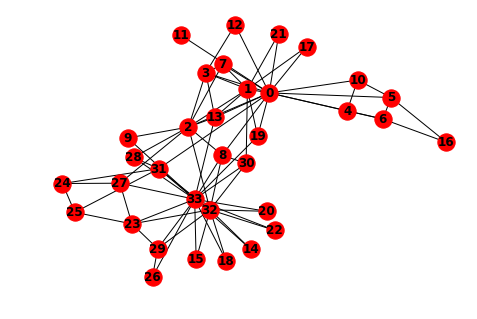

In [39]:
# Karate Club Graph
karate_club = nx.karate_club_graph() # Getting the graph from the library

karate_club.add_edges_from([(u, v, {'sign': 1}) for u, v in karate_club.edges]) # Set the positive relationship for all the edges
nx.draw(karate_club, with_labels=True, font_weight='bold')

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite

sampler = EmbeddingComposite(DWaveSampler())

import dwave_networkx as dnx
max_cut = dnx.maximum_cut(karate_club, sampler)


max_cut_complementary = []

for node in karate_club.nodes:
    if node not in max_cut:
        max_cut_complementary.append(node)
        karate_club.nodes[node]['color'] = 0
    else:
        karate_club.nodes[node]['color'] = 1
    

print("Len of Max-Cut:", len(max_cut))
print("Len of Complementary Max-Cut:", len(max_cut_complementary))


Len of Max-Cut: 14
Len of Complementary Max-Cut: 18


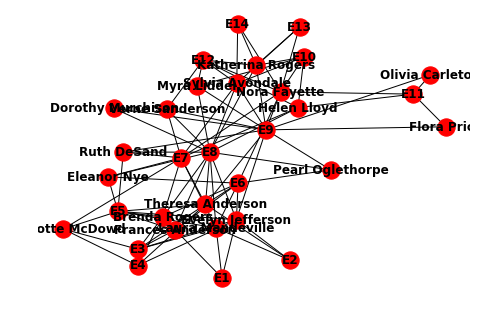

In [41]:
# Davis Southern Women Club Graph
davis_southern_women = nx.davis_southern_women_graph() # Getting the graph from the library

davis_southern_women.add_edges_from([(u, v, {'sign': 1}) for u, v in davis_southern_women.edges]) # Set the positive relationship for all the edges
nx.draw(davis_southern_women, with_labels=True, font_weight='bold')

from dwave.system.samplers import DWaveSampler
from dwave.system.composites import EmbeddingComposite

sampler = EmbeddingComposite(DWaveSampler())

import dwave_networkx as dnx
max_cut = dnx.maximum_cut(davis_southern_women, sampler)


max_cut_complementary = []

for node in davis_southern_women.nodes:
    if node not in max_cut:
        max_cut_complementary.append(node)
        davis_southern_women.nodes[node]['color'] = 0
    else:
        davis_southern_women.nodes[node]['color'] = 1
    

print("Len of Max-Cut:", len(max_cut))
print("Len of Complementary Max-Cut:", len(max_cut_complementary))